In [1]:
import os 
os.chdir('../')
print(os.getcwd())
import utils
from spyridonidis.Ford_dataset_s import SatGrdDatasetFord, parse_args, getSavePath, train_logs, train_logs_img_inds, test_logs, test_logs_img_inds
from spyridonidis.models_ford_s import ModelFord
from spyridonidis.utils_s import render_point_cloud
# from models_ford import ModelFord as ModelFord_orig
from torchvision import transforms
import torch
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt 
import matplotlib.gridspec as gridspec
import numpy as np 
from VGG import Unet, space2channel

args = parse_args(['--resume', '0'])
save_path = getSavePath(args)
save_path ='ModelsFord/3DoF/Log_1lat20.0m_lon20.0m_rot10.0_Nit1_CrossAttn_FL_SL_3D_Uncertainty'
cameras = ['FL', 'SL'] 
args.image_H = 448 #256
args.image_W = 896#1024
args.cameras = cameras
args.batch_size = 1
args.lifting = '3D' #homography

train_log_start=2; train_log_end=3
train_set = SatGrdDatasetFord(logs=test_logs[train_log_start:train_log_end],
                                logs_img_inds=test_logs_img_inds[train_log_start:train_log_end],
                                shift_range_lat=args.shift_range_lat,
                                shift_range_lon=args.shift_range_lon,
                                rotation_range=args.rotation_range, whole=args.train_whole,
                                H = args.image_H, W = args.image_W, cameras=cameras, mode='test')#256, 1024
train_loader = DataLoader(train_set, batch_size=args.batch_size, shuffle=False, num_workers=2, prefetch_factor = 1)


device = 'cpu'#torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
args.Rs = {key:item.to(device) for key, item in train_set.Rs.items()}
args.Ts = {key:item.to(device) for key, item in train_set.Ts.items()}
args.Ks = {key:item.to(device) for key, item in train_set.Ks.items()}
net = ModelFord(args).to(device)
net.load_state_dict(torch.load(os.path.join(save_path, 'model_4.pth')), strict=False)

/mnt/c/Users/dimitris/Desktop/MyFiles/diplomatikh/pytorch-tensorflow/pytorch/Cross-View-Localization/Boosting3DoFAccuracy
Error importing huggingface_hub.hf_api: cannot import name 'COMMON_SAFE_ASCII_CHARACTERS' from 'charset_normalizer.constant' (/home/dimitris/miniconda3/envs/condapy310/lib/python3.10/site-packages/charset_normalizer/constant.py)
save_path: ./ModelsFord/3DoF/Log_1lat20.0m_lon20.0m_rot10.0_Nit2_CrossAttn_Uncertainty


/home/dimitris/miniconda3/envs/condapy310/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/dimitris/miniconda3/envs/condapy310/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/home/dimitris/miniconda3/envs/condapy310/lib/python3.10/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1708025847130/work/aten/src/ATen/native/TensorShape.cpp:3549.)
  re

<All keys matched successfully>

In [40]:
xyz = net.xyz[2][:,:,:,:,:].permute([4, 0, 1, 2, 3]).view(3,-1).cpu()


us_FL, vs_FL = render_point_cloud(2, 'FL', args, net, xyz)
us_SL, vs_SL = render_point_cloud(2, 'SL', args, net, xyz)

# fig = plt.figure(figsize=(20, 20))
# gs = gridspec.GridSpec(4, 2, wspace=0, hspace=0)
# ax0 = fig.add_subplot(gs[0, 0:2])# This spans all columns in the first row
# ax1 = fig.add_subplot(gs[1, 0:2])
# ax20 = fig.add_subplot(gs[2, 0])
# ax21 = fig.add_subplot(gs[2, 1])
# ax30 = fig.add_subplot(gs[3, 0])
# ax31 = fig.add_subplot(gs[3, 1])

# ax0.imshow(grd_camera_list)
# ax0.scatter(us_FL + grd_camera_list.shape[1]/2, vs_FL, color='red', s = 5)
# ax0.scatter(us_SL, vs_SL, color='blue', s = 5)
# ax1.imshow(grd_feat_camera_list)
# ax20.imshow(sum_rgb_proj)
# ax21.imshow(sum_proj)
# ax30.imshow(sat_im)
# ax31.imshow(sat_fea)

# grd_feat_cameras_proj, grd_c_cameras, grd_uvs_cameras, masks_cameras = net.project_grds_to_sat(grd_feat_cameras, None, args.Rs, args.Ts, shift_u, shift_v, theta, feat_level, args.cameras)


points rendered for resolution (W = 448.0,H = 224.0)
points rendered for resolution (W = 448.0,H = 224.0)


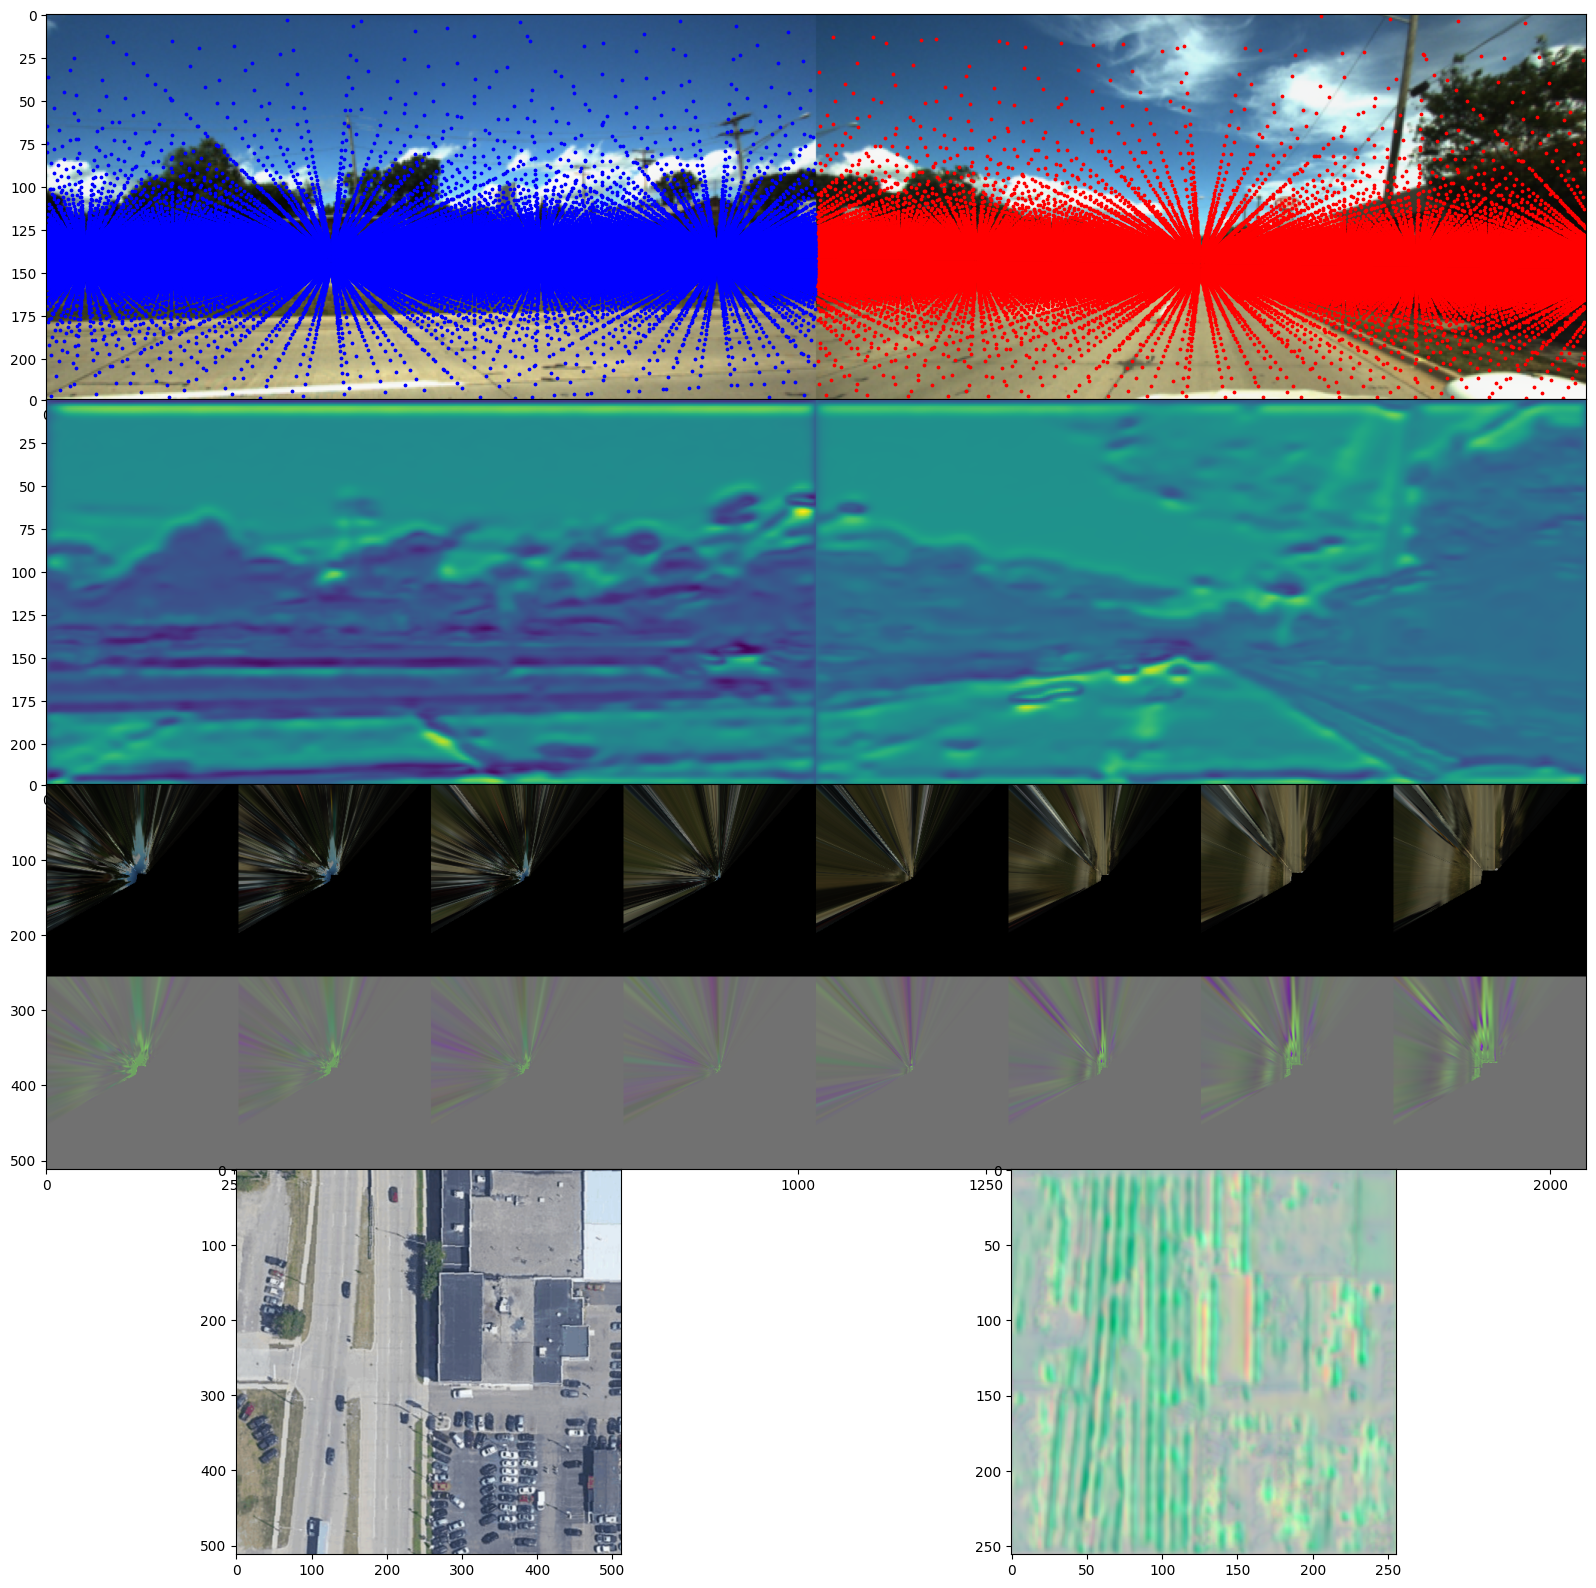

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

In [74]:
s = 0
for data in train_loader:
    # sat_img, grd_img, gt_shift_u, gt_shift_v, gt_heading, grd_name = [item.to(device).unsqueeze(0) if type(item) == torch.Tensor else item for item in train_set[i]]
    # R_FL, T_FL rotation and translation from camera to car body frame 
    fig = plt.figure(figsize=(20, 20))
    gs = gridspec.GridSpec(4, 2, wspace=0, hspace=0)
    ax0 = fig.add_subplot(gs[0, 0:2])# This spans all columns in the first row
    ax1 = fig.add_subplot(gs[1, 0:2])
    ax2 = fig.add_subplot(gs[2, 0:2])
    # ax20 = fig.add_subplot(gs[2, 0])
    # ax21 = fig.add_subplot(gs[2, 1])
    ax30 = fig.add_subplot(gs[3, 0])
    ax31 = fig.add_subplot(gs[3, 1])



    sat_img, grd_imgs, gt_shift_u, gt_shift_v, gt_heading, grd_names = [[camera.to(device) if type(camera) == torch.Tensor else camera for camera in item] if type(item)== list else item.to(device) if type(item) == torch.Tensor else item for item in data]
    # for idx, camera in enumerate(args.cameras):
    #     
    with torch.no_grad():
        feat_level = 2
        ic = 1
        batch = 0

        #start of CrossAttn_rot_corr() 
        sat_feat_list, _ = net.SatFeatureNet(sat_img)

        #concat along batch dim 
        grd_imgs_cat = torch.cat(grd_imgs, dim=0)
        grd8, grd4, grd2 = net.GrdEnc(grd_imgs_cat)
        grd_feat_cameras_list = net.GrdDec(grd8, grd4, grd2)

        #unconcat along batch dim
        grd_feat_cameras_list = [torch.chunk(grd_feat, len(args.cameras), dim=0) for grd_feat in grd_feat_cameras_list]

        B = args.batch_size
        shift_u = torch.zeros([B, 1], dtype=torch.float32, requires_grad=True, device=sat_img.device) 
        shift_v = torch.zeros([B, 1], dtype=torch.float32, requires_grad=True, device=sat_img.device) 
        theta = torch.zeros([B, 1], dtype=torch.float32, requires_grad=True, device=sat_img.device) 

        img_size = grd_feat_cameras_list[feat_level][0].shape[-2:]
        grd_imgs = [transforms.Resize(size=img_size)(img) for img in grd_imgs]
        grd_feat_cameras = grd_feat_cameras_list[feat_level]
        sat_feat = sat_feat_list[feat_level]

        grd_feat_cameras_proj, grd_c_cameras, grd_uvs_cameras, masks_cameras = net.project_grds_to_sat(grd_feat_cameras, None, args.Rs, args.Ts, shift_u, shift_v, theta, feat_level, args.cameras)
        grd_rgb_cameras_proj, grd_c_cameras, grd_uvs_cameras, masks_cameras = net.project_grds_to_sat(grd_imgs, None, args.Rs, args.Ts, shift_u, shift_v, theta, feat_level, args.cameras)

        grd_feat_camera_list = []
        grd_camera_list = []
        for idx , camera in enumerate(args.cameras):
            fig = plt.figure(figsize=(20, 20))
            # grd_feat_camera_proj = grd_feat_cameras_proj[idx][batch].cpu().permute([1,2,0])[...,ic*3:(ic+1)*3]
            grd_feat_camera = grd_feat_cameras[idx][batch].cpu().permute([1,2,0])[...,ic*3:(ic+1)*3]
            grd_img = grd_imgs[idx][batch].cpu().permute([1,2,0])
            grd_camera_list.append(grd_img)

            grd_feat_camera = np.array(grd_feat_camera)
            grd_feat_camera = (grd_feat_camera - np.min(grd_feat_camera)) / (np.max(grd_feat_camera) - np.min(grd_feat_camera))
            grd_feat_camera_list.append(grd_feat_camera)

            sat_im = sat_img[batch].cpu().permute([1,2,0])
            sat_fea = sat_feat[batch].cpu().permute([1,2,0])[...,ic*3:(ic+1)*3]

            sat_fea = np.array(sat_fea)
            sat_fea = (sat_fea - np.min(sat_fea)) / (np.max(sat_fea) - np.min(sat_fea))

            # grd_feat_camera_proj = np.array(grd_feat_camera_proj)
            # grd_feat_camera_proj = (grd_feat_camera_proj - np.min(grd_feat_camera_proj)) / (np.max(grd_feat_camera_proj) - np.min(grd_feat_camera_proj))

        sum_proj = sum(grd_feat_cameras_proj)
        sum_proj = torch.split(sum_proj[0], 1, dim =-1)
        sum_proj = torch.cat(sum_proj, dim =-2).squeeze(-1)
        sum_proj = sum_proj.permute([1,2,0])[...,ic*3:(ic+1)*3]
        sum_proj = np.array(sum_proj)
        sum_proj = (sum_proj - np.min(sum_proj)) / (np.max(sum_proj) - np.min(sum_proj))

        sum_rgb_proj = sum(grd_rgb_cameras_proj)
        sum_rgb_proj = torch.split(sum_rgb_proj[0], 1, dim =-1)
        sum_rgb_proj = torch.cat(sum_rgb_proj, dim =-2).squeeze(-1)
        sum_rgb_proj = sum_rgb_proj.permute([1,2,0])
        sum_rgb_proj = np.array(sum_rgb_proj)
        sum_rgb_proj = (sum_rgb_proj - np.min(sum_rgb_proj)) / (np.max(sum_rgb_proj) - np.min(sum_rgb_proj))

        sum_proj_all = np.concatenate((sum_rgb_proj, sum_proj), axis = 0)
        # sw = sum_proj_all.shape[1]//2
        # sum_proj_all = np.concatenate((sum_proj_all[:, :sw ,: ], sum_proj_all[:, sw:, :]), axis = 0)

        grd_camera_list = np.concatenate(list(reversed(grd_camera_list)), axis=1)
        grd_feat_camera_list = np.concatenate(list(reversed(grd_feat_camera_list)), axis=1)


        # # img1 = grd_feat[0].cpu().permute([1,2,0])[..., 3*ic:3*(ic+1)].numpy()

        ax0.imshow(grd_camera_list)
        ax1.imshow(grd_feat_camera_list.sum(axis=-1))
        ax0.scatter(us_FL + grd_camera_list.shape[1]/2, vs_FL, color='red', s = 3, alpha = 1)
        ax0.scatter(us_SL, vs_SL, color='blue', s = 3, alpha = 1)
        # ax20.imshow(sum_rgb_proj)
        # ax21.imshow(sum_proj)
        ax2.imshow(sum_proj_all)
        ax30.imshow(sat_im)
        ax31.imshow(sat_fea)


        # plt.subplot(2,3,5)
        # plt.imshow(sat_fea)
        # plt.subplot(2,3,6)
        # plt.imshow(grd_feat_camera_proj)

        plt.show()
    

    
    s+=1
    if s>0:
        break

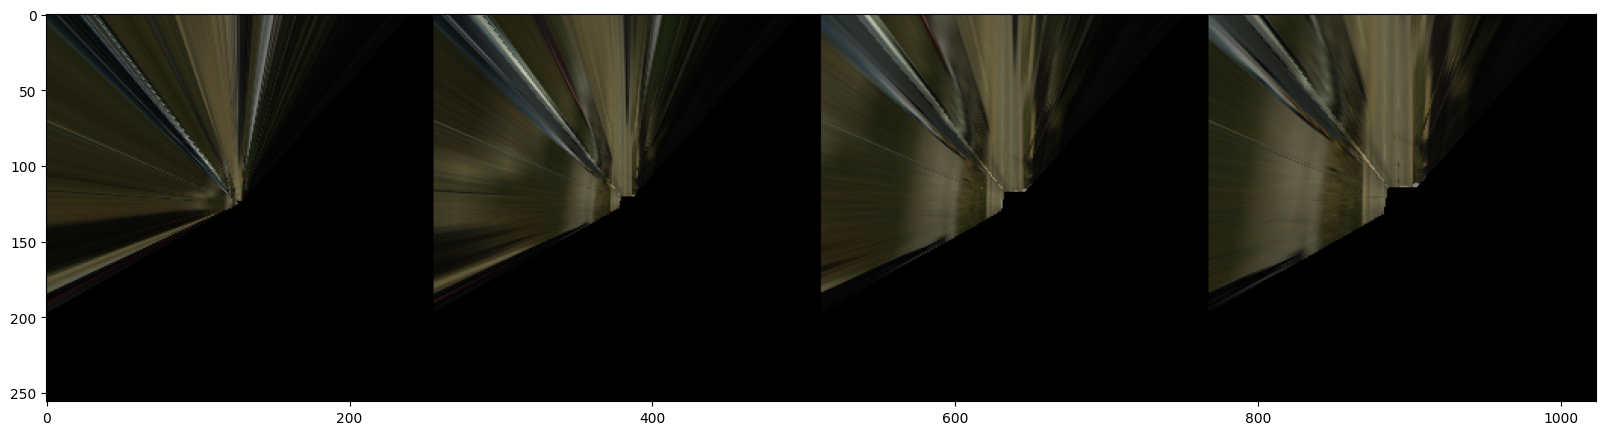

In [24]:


# sum_rgb_proj = grd_rgb_cameras_proj[1]

# sum_rgb_proj = sum(grd_rgb_cameras_proj)
# sum_rgb_proj = torch.split(sum_rgb_proj[0], 1, dim =-1)
# img = sum_rgb_proj[-1].squeeze(-1).permute([1,2,0])
# img = np.array(img)
# img = (img - np.min(img)) / (np.max(img) - np.min(img))
# # img = img[:,:, ic*3:(ic+1)*3]
# plt.figure(figsize=(10,10))
# plt.imshow(img)

# sum_proj = sum(grd_feat_cameras_proj[-1])
# sum_proj = torch.split(sum_proj[0], 1, dim =-1)
# # sum_proj = torch.cat(sum_proj, dim =-2).squeeze(-1)
# sum_proj = sum_proj.permute([1,2,0])[...,ic*3:(ic+1)*3]
# sum_proj = np.array(sum_proj)
# sum_proj = (sum_proj - np.min(sum_proj)) / (np.max(sum_proj) - np.min(sum_proj))
# plt.imshow(sum_proj)
# sum_rgb_proj = torch.cat(sum_rgb_proj, dim =-2).squeeze(-1)
# sum_rgb_proj = sum_rgb_proj.permute([1,2,0])
# sum_rgb_proj = np.array(sum_rgb_proj)
# sum_rgb_proj = (sum_rgb_proj - np.min(sum_rgb_proj)) / (np.max(sum_rgb_proj) - np.min(sum_rgb_proj))


plt.figure(figsize=(20,20))
plt.imshow(sum_proj_all[:256, 1024:])



In [ ]:
for data in train_loader:
    sat_img, grd_imgs, gt_shift_u, gt_shift_v, gt_heading, grd_names = [[camera.to(device) if type(camera) == torch.Tensor else camera for camera in item] if type(item)== list else item.to(device) if type(item) == torch.Tensor else item for item in data]
    # for idx, camera in enumerate(args.cameras):
    #     fig = plt.figure(figsize=(20, 10))
    with torch.no_grad():
        # out = net.CrossAttn_rot_corr(sat_img, grd_imgs, gt_shift_u, gt_shift_v, gt_heading, mode='train')
        
        out = torch.jit.trace(net.CrossAttn_rot_corr, sat_img, grd_imgs, gt_shift_u, gt_shift_v, gt_heading, 'train')

        # feat_level = 2
        # ic = 0
        # batch = 0
        # grd_feat_proj = grd_feat_proj_list[feat_level]
        # grd_feat_proj = grd_feat_proj[batch].cpu().permute([1,2,0])[...,ic*3:(ic+1)*3]
        # grd_feat_proj = np.array(grd_feat_proj)
        # grd_feat_proj = (grd_feat_proj - np.min(grd_feat_proj)) / (np.max(grd_feat_proj) - np.min(grd_feat_proj))

        # fig = plt.figure(figsize=(20, 10))
        # plt.subplot(2,3,1)
        # plt.imshow(grd_feat_proj)
    
    break

In [ ]:
from torch.cuda.amp import GradScaler
import torch.optim as optim


scaler = GradScaler()
optimizer = optim.AdamW(net.parameters(), lr=0.0001)

for data in train_loader:
    # sat_img, grd_imgs, gt_shift_u, gt_shift_v, gt_heading, grd_names = [[camera.to(device) if type(camera) == torch.Tensor else camera for camera in item] if type(item)== list else item.to(device) if type(item) == torch.Tensor else item for item in data]
    # opt_loss, loss_decrease, shift_lat_decrease, shift_lon_decrease, thetas_decrease, loss_last, \
    # shift_lat_last, shift_lon_last, theta_last, \
    # corr_loss 
    d =  net.CrossAttn_rot_corr(sat_img, grd_imgs, gt_shift_u, gt_shift_v, gt_heading, mode='train')
    
    loss = opt_loss + corr_loss * torch.exp(-net.coe_T) + net.coe_T + net.coe_R
    loss.backward()
    optimizer.step()
    # scaler.scale(loss).backward()
    # scaler.step(optimizer)
    # scaler.update()
    break

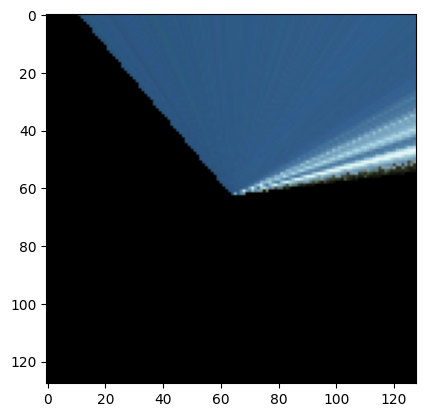

In [38]:
for data in train_loader:
    break

sat_img, grd_imgs, gt_shift_u, gt_shift_v, gt_heading, grd_names = [[camera.to(device) if type(camera) == torch.Tensor else camera for camera in item] if type(item)== list else item.to(device) if type(item) == torch.Tensor else item for item in data]

B= 1
shift_u = torch.zeros([B, 1], dtype=torch.float32, requires_grad=True, device=sat_img.device)
shift_v = torch.zeros([B, 1], dtype=torch.float32, requires_grad=True, device=sat_img.device)
theta = torch.zeros([B, 1], dtype=torch.float32, requires_grad=True, device=sat_img.device)
with torch.no_grad():
    grd_feat_proj, grd_conf_proj, grd_uv, mask = net.project_grds_to_sat(grd_imgs, None, args.Rs, args.Ts, shift_u, shift_v, theta, 1, args.cameras)
plt.imshow(grd_feat_proj[0][0].permute((1,2,0, 3))[:,:,:, -5].cpu().numpy())
plt.show()

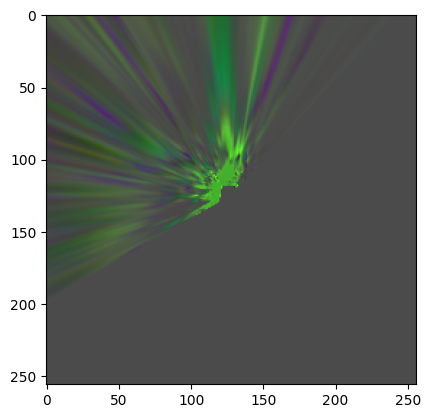

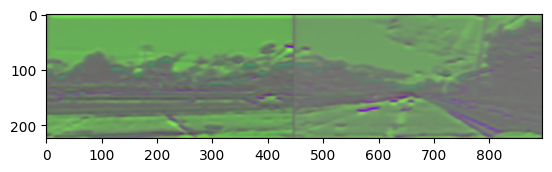

In [76]:
ic = 1
sum_proj = sum(grd_feat_cameras_proj)
sum_proj = sum_proj[0, ic*3:(ic+1)*3, :, :, 0].permute((1,2,0)).numpy()
# sum_proj = torch.split(sum_proj[0], 1, dim =-1)
# sum_proj = torch.cat(sum_proj, dim =-2).squeeze(-1)
# sum_proj = sum_proj.permute([1,2,0])[...,ic*3:(ic+1)*3]
# sum_proj = np.array(sum_proj)
sum_proj = (sum_proj - np.min(sum_proj)) / (np.max(sum_proj) - np.min(sum_proj))
plt.imshow(sum_proj)
plt.show()
plt.imshow(grd_feat_camera_list)